### Python Homework 8
#### Uniquename: Qifan
#### Email: qifan@umich.edu
#### It took me approximately 4 hours to complete this.

## Problem 1

In [9]:
import time
class Trie:
    ''' Representing strings in a dictionary'''
    def __init__(self):
        self.root=dict()
    def add(self,s):
        temp=self.root
        if len(s)==0:
            temp[s]=None
        for i in range(len(s)):
            mid=temp.get(s[i],dict())
            temp[s[i]]=mid
            temp=temp[s[i]]
        temp[""]=None
        
    def helper(self,s,dic):
        if len(s)==0:
            if "" in dic.keys(): return True
            else: return False
        elif not s[0] in dic.keys(): return False
        elif len(s)==1 and "" in dic[s[0]].keys(): return True
        elif len(s)==1 and (not "" in dic[s[0]].keys()): return False
        else: 
            if self.helper(s[1:],dic[s[0]]): return True
            else: return False
    def contains(self,s):
        return self.helper(s,self.root)
    def __repr__(self):
        return str(self.root)
        
        
        

In [10]:
t=Trie()
t.add("cat")
t.add("car")
#t.add("")
#t.add("")
t.contains("das")

False

In [11]:
def wordlist2trie(lis):
    if not isinstance(lis,list):
        raise TypeError("The input should be a list!")
    if not all(isinstance(x,str) for x in lis):
        raise TypeError("Every element in the list should be a string")
    t=Trie()
    for i in lis:
        if not t.contains(i):
            t.add(i)
    return t

In [12]:
#wordlist2trie(["1","2","3"])

In [13]:
lis=["co","cog","c"]
u=wordlist2trie(lis)
u.root

{'c': {'o': {'': None, 'g': {'': None}}, '': None}}

In [14]:
import urllib.request
word_file=urllib.request.urlopen("http://www.greenteapress.com/thinkpython/code/words.txt")
words=word_file.read().decode("ascii")
word_list=[]
for i in words.split("\n"):
    word_list.append(i.strip())
big_trie=wordlist2trie(word_list)


In [15]:
#print(big_trie)

In [16]:
#big_trie.contains("abeyanciest")

## Problem 2

In [17]:
def validity(lis):
    if not isinstance(lis,list): return False
    if not all(isinstance(i,int) or isinstance(i,float) for i in lis): return False
    return True

In [18]:
# Merge Sort
def mergesort(lis):
    if not validity(lis): 
        raise TypeError("The input should be a list composed of integers or floats!")
    l=len(lis)
    if l<=1: return lis
    left,right=[],[]
    for i in range(l):
        if i<l/2: left.append(lis[i])
        else: right.append(lis[i])
    left=mergesort(left)
    right=mergesort(right)
    return Merge(left,right)
def Merge(left,right):
    result=[]
    while len(left)!=0 and len(right)!=0:
        if right[0]<left[0]: 
            result.append(right[0])
            right=right[1:]
        else:
            result.append(left[0])
            left=left[1:]
    while len(left)!=0 and len(right)==0:
        result.append(left[0])
        left=left[1:]
    while len(right)!=0 and len(left)==0:
        result.append(right[0])
        right=right[1:]
    return result

In [19]:
def quicksort(lis):
    #print("a")
    if not validity(lis): 
        raise TypeError("The input should be a list composed of integers or floats!")
    if len(lis)==0: return []
    if len(lis)==1: return lis
    pivot=lis[-1]
    less,more,equal=[],[],[]
    for i in lis:
        if i<pivot: less.append(i)
        elif i>pivot: more.append(i)
        else: equal.append(i)
    return quicksort(less)+equal+quicksort(more)

In [20]:
#quicksort([1,2,3,9,11])

In [21]:
def bubblesort(lis):
    if not validity(lis): 
        raise TypeError("The input should be a list composed of integers or floats!")
    if len(lis)<=1: return lis
    m=True
    while m:
        m=False
        for i in range(1,len(lis)):
            if lis[i]<lis[i-1]:
                lis[i-1],lis[i]=lis[i],lis[i-1]
                m=True
    return lis

In [22]:
def run_timing_expt(lis):
    if not validity(lis):
        raise TypeError("The input should be a list composed of integers or floats!")
    t_merge_start=time.time()
    mergesort(lis)
    t_merge_end=time.time()
        
    t_quick_start=time.time()
    quicksort(lis)
    t_quick_end=time.time()
        
    t_bubble_start=time.time()
    bubblesort(lis)
    t_bubble_end=time.time()
    t_merge,t_quick,t_bubble=t_merge_end-t_merge_start,t_quick_end-t_quick_start,t_bubble_end-t_bubble_start
    return (t_merge,t_quick,t_bubble)

In [23]:
import numpy as np
import pandas as pd
import random
n= [500,1000,1500,2000,2500]
timing_merge=pd.DataFrame({"a":[0]*20,"b":[0]*20,"c":[0]*20,"d":[0]*20,"e":[0]*20})
timing_quick=pd.DataFrame({"a":[0]*20,"b":[0]*20,"c":[0]*20,"d":[0]*20,"e":[0]*20})
timing_bubble=pd.DataFrame({"a":[0]*20,"b":[0]*20,"c":[0]*20,"d":[0]*20,"e":[0]*20})
for i in range(5):
    for j in range(20):
        result=run_timing_expt(list(range(n[i])))
        timing_merge.iloc[j,i]=result[0]
        timing_quick.iloc[j,i]=result[1]
        timing_bubble.iloc[j,i]=result[2]


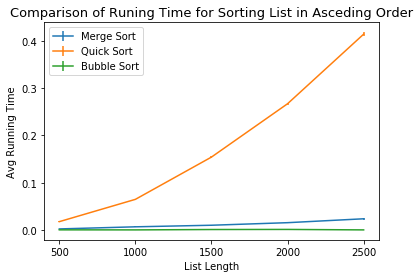

In [25]:
import matplotlib.pyplot as pyt
import math as m
x=["500","1000","1500","2000","2500"]
#pyt.figure(figsize=(14,3.5))
#pyt.subplot(131)
pyt.errorbar(x,np.mean(timing_merge),yerr=np.std(timing_merge)/m.sqrt(20),label="Merge Sort")
#pyt.title("Runing Time of Merge Sort")
#pyt.subplot(132)
pyt.errorbar(x,np.mean(timing_quick),yerr=np.std(timing_quick)/m.sqrt(20),label="Quick Sort")
#pyt.title("Runing Time of Quick Sort")
#pyt.subplot(133)
#pyt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)
pyt.errorbar(x,np.mean(timing_bubble),yerr=np.std(timing_bubble)/m.sqrt(20),label="Bubble Sort")
#pyt.title("Runing Time of Bubble Sort")
pyt.title("Comparison of Runing Time for Sorting List in Asceding Order",fontsize=13)
pyt.xlabel("List Length")
pyt.ylabel("Avg Running Time")
pyt.legend()
pyt.savefig("ascending.pdf")
_=pyt.show()


##### For quicksort, when the length of a sorted list is larger than 2500 (when the pivot is the last element), the function will recurse for more than 5000 times.
##### Each time when calling quicksort([1:n]), less=[1:n-1] and more=[n]. Therefore when the lenght for a sorted list is n, the recursion will happen n*2-1 times.
#### Note: The standard error of the avg running time is calculated by sqrt(variance/20) and this made the error bar in most cases too small to be visible.

In [ ]:
n= [500,1000,1500,2000,2500]
timing_merge2=pd.DataFrame({"a":[0]*20,"b":[0]*20,"c":[0]*20,"d":[0]*20,"e":[0]*20})
timing_quick2=pd.DataFrame({"a":[0]*20,"b":[0]*20,"c":[0]*20,"d":[0]*20,"e":[0]*20})
timing_bubble2=pd.DataFrame({"a":[0]*20,"b":[0]*20,"c":[0]*20,"d":[0]*20,"e":[0]*20})
for i in range(5):
    for j in range(20):
        result=run_timing_expt(sorted(list(range(n[i])), reverse=True))
        timing_merge2.iloc[j,i]=result[0]
        timing_quick2.iloc[j,i]=result[1]
        timing_bubble2.iloc[j,i]=result[2]

In [1]:
x=["500","1000","1500","2000","2500"]
#pyt.figure(figsize=(14,3.5))
#pyt.subplot(131)
pyt.errorbar(x,np.mean(timing_merge2),yerr=np.std(timing_merge2)/m.sqrt(20),label="Merge Sort")
#pyt.title("Runing Time of Merge Sort")
#pyt.subplot(132)
pyt.errorbar(x,np.mean(timing_quick2),yerr=np.std(timing_quick2)/m.sqrt(20),label="Quick Sort")
#pyt.title("Runing Time of Quick Sort")
#pyt.subplot(133)
#pyt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)
pyt.errorbar(x,np.mean(timing_bubble2),yerr=np.std(timing_bubble2)/m.sqrt(20),label="Bubble Sort")
#pyt.title("Runing Time of Bubble Sort")
pyt.title("Comparison of Runing Time for Sorting List in Descending Order",fontsize=13)
pyt.xlabel("List Length")
pyt.ylabel("Avg Running Time")
pyt.legend()
pyt.savefig("descending.pdf")
_=pyt.show()


NameError: name 'pyt' is not defined

In [34]:
n= [500,1000,1500,2000,2500]
timing_merge3=pd.DataFrame({"a":[0]*20,"b":[0]*20,"c":[0]*20,"d":[0]*20,"e":[0]*20})
timing_quick3=pd.DataFrame({"a":[0]*20,"b":[0]*20,"c":[0]*20,"d":[0]*20,"e":[0]*20})
timing_bubble3=pd.DataFrame({"a":[0]*20,"b":[0]*20,"c":[0]*20,"d":[0]*20,"e":[0]*20})
for i in range(5):
    for j in range(20):
        result=run_timing_expt([random.random() for _ in range(n[i])])
        timing_merge3.iloc[j,i]=result[0]
        timing_quick3.iloc[j,i]=result[1]
        timing_bubble3.iloc[j,i]=result[2]

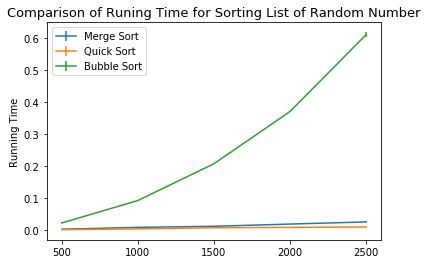

In [35]:
x=["500","1000","1500","2000","2500"]
#pyt.figure(figsize=(14,3.5))
#pyt.subplot(131)
pyt.errorbar(x,np.mean(timing_merge3),yerr=np.std(timing_merge3)/m.sqrt(20),label="Merge Sort")
#pyt.title("Runing Time of Merge Sort")
#pyt.subplot(132)
pyt.errorbar(x,np.mean(timing_quick3),yerr=np.std(timing_quick3)/m.sqrt(20),label="Quick Sort")
#pyt.title("Runing Time of Quick Sort")
#pyt.subplot(133)
#pyt.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1)
pyt.errorbar(x,np.mean(timing_bubble3),yerr=np.std(timing_bubble3)/m.sqrt(20),label="Bubble Sort")
#pyt.title("Runing Time of Bubble Sort")
pyt.title("Comparison of Runing Time for Sorting List of Random Number",fontsize=13)#pyt.xlabel("List Length")
pyt.ylabel("Avg Running Time")
pyt.legend()
pyt.savefig("random.pdf")
_=pyt.show()